<a href="https://colab.research.google.com/github/abhi-11nav/NewYork_HousingPrice/blob/main/NewYork_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries for data manipulation 

import pandas as pd
import numpy as np

# Dataset Credits 

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [2]:
url = "https://raw.githubusercontent.com/abhi-11nav/NewYork_HousingPrice/main/AB_NYC_2019.csv"

In [3]:
dataset = pd.read_csv(url)

In [4]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# First we check for any missing data in the dataset

dataset.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

** We can observe that the features "name", "hsot_name", "last_review",  "reviews_per_month" has missing valus. We can see how each features is and deal with the missing values

In [6]:
# We know that some features only conists of unique values and add no value to the output. So we are going to remove them from the datset

dataset.drop(["id","name","host_id","host_name"],axis=1,inplace=True)

In [7]:
dataset.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
dataset.isna().any()

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [9]:
# Let us dig into the features with missing values

for x in dataset.columns:
  if dataset[x].isna().any() == True:
    print(dataset[x].isna().sum(), "--", x)

10052 -- last_review
10052 -- reviews_per_month


In [10]:
dataset['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [11]:
# Importing libraries for visualization 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [12]:
dataset["reviews_per_month"].max()

58.5

In [13]:
# Filling the data using backward fill technique 

dataset["last_review_full"] = dataset["last_review"].bfill()

# Filling the data at the end using forward fill technique 

dataset["last_review_full"] = dataset["last_review_full"].ffill()

In [14]:
# Dropping the extra feature 

dataset["last_review"] = dataset["last_review_full"]


dataset.drop(["last_review_full"],inplace=True,axis=1)

In [15]:

# Checking for missing values in last_review feature for last time after all the modifications

dataset["last_review"].isna().sum()

0

So, the missing values in this feature are dealt with

In [16]:
dataset["reviews_per_month"].mean()

1.3732214298586618

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


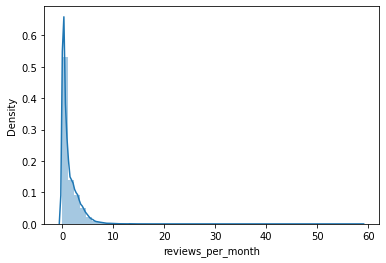

In [17]:
# Plotting the distribution of the data

sns.distplot(dataset["reviews_per_month"])

In [18]:
# Filling the missing data in reviews_per_month feature with mean values of the data present 

dataset['reviews_per_month_meanfill'] = dataset['reviews_per_month'] .fillna(dataset["reviews_per_month"].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'reviews_per_month_meanfill')

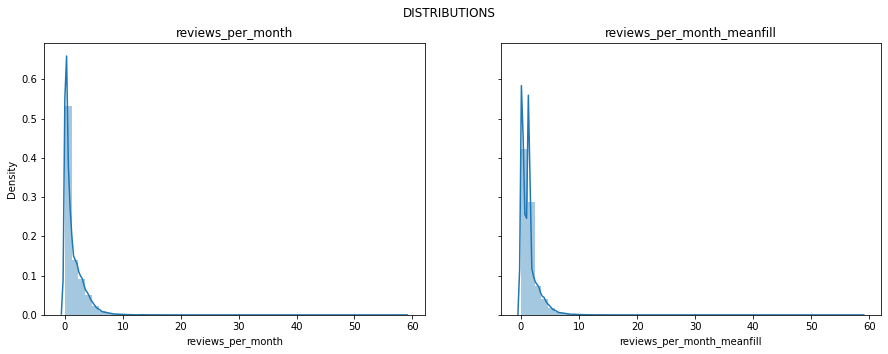

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle("DISTRIBUTIONS")

sns.distplot(dataset["reviews_per_month"],ax=axes[0])
axes[0].set_title("reviews_per_month")

sns.distplot(dataset["reviews_per_month_meanfill"],ax=axes[1])
axes[1].set_title("reviews_per_month_meanfill")

Since we can notice that the distribution hasnt been affected much by filling the missing values with mean. We will stick to this

In [20]:
# Dropping the extra feature 

dataset["reviews_per_month"] = dataset["reviews_per_month_meanfill"]

dataset.drop(["reviews_per_month_meanfill"],inplace=True,axis=1)

In [21]:
dataset.isna().any()

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [22]:
# Setting the reviews_per_month to 0 if number of reviews is 0

target_index = dataset[dataset["number_of_reviews"]==0]["reviews_per_month"].index

dataset.loc[target_index,"reviews_per_month"] = 0

In [23]:
# Verifying if the task has been accomplised

dataset[dataset["number_of_reviews"]==0]["reviews_per_month"]

2        0.0
19       0.0
26       0.0
36       0.0
38       0.0
        ... 
48890    0.0
48891    0.0
48892    0.0
48893    0.0
48894    0.0
Name: reviews_per_month, Length: 10052, dtype: float64

PERFECT !!

Dataset now has no missing values 

In [24]:
dataset.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-05,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
# Now Let us deal with the categorical variables

for x in dataset.columns:
  print(type(dataset[x][0]))

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


We can see that there are 4 features with string values

In [26]:
# let us print out the names of feature columns

for x in dataset.columns:
  if type(dataset[x][0]) == str:
    print(x," is a feature consisting of string values")
    print(dataset[x].value_counts(),"\n")

neighbourhood_group  is a feature consisting of string values
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64 

neighbourhood  is a feature consisting of string values
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64 

room_type  is a feature consisting of string values
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64 

last_review  is a feature consisting of string values
2019-07-01    1843
2019-06-30    1837
2019-06-23    1751
2019-07-07    1123
2019-06-24    1045
              ... 
2014-09-23       1
2012-12-25       1
2012-12-31    

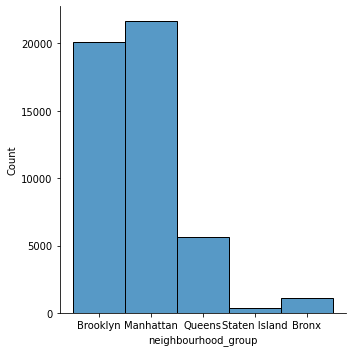

In [27]:
# Let us plot neigbourhood and neighbourhod_group against price

sns.displot(dataset["neighbourhood_group"])

In [28]:
# Since neighbourhood feature has so many unique values. It is best practice to eliminate it 

print(len(dataset["neighbourhood"].value_counts())," are the number of unique values in the neighbourhood feature")

221  are the number of unique values in the neighbourhood feature


In [29]:
# Dropping the feature neighbourhood

dataset.drop(["neighbourhood"],inplace=True, axis=1)

In [30]:
# Applying one hot encoding for two categorical features neighbourhood_group and room_type

temp_df = pd.DataFrame()

temp_df["neighbourhood_group"] = dataset["neighbourhood_group"]
temp_df["room_type"] = dataset["room_type"]

temp_df = pd.get_dummies(temp_df,drop_first=True)

In [31]:
dataset = pd.concat([dataset,temp_df],axis=1,join="inner")

In [32]:
# Dropping the dealt categorical features in the dataset 

dataset.drop(["neighbourhood_group","room_type"],inplace=True,axis=1)

In [33]:
dataset.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,2019-07-05,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,1,0,0,0,0


In [34]:
# Now we have to convert last_review feature into a feature with numeric values 

dataset

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,2019-07-05,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2019-07-08,0.00,2,9,1,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,2019-07-08,0.00,2,36,1,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,2019-07-08,0.00,1,27,0,1,0,0,0,0
48893,40.75751,-73.99112,55,1,0,2019-07-08,0.00,6,2,0,1,0,0,0,1


In [35]:
dataset.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,2019-07-05,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,1,0,0,0,0


In [36]:
# Changing the datatype for last_review feature from string to datetime 

dataset["last_review"] = pd.to_datetime(dataset["last_review"],format='%Y%m%d')

ValueError: ignored

In [37]:
# Splitting the last_review column into year, month and day

dataset["last_review_year"] = pd.to_datetime(dataset["last_review"]).dt.year
dataset["last_review_month"] = pd.to_datetime(dataset["last_review"]).dt.month
dataset["last_review_day"] = pd.to_datetime(dataset["last_review"]).dt.day

In [38]:
# Eliminating the last_review column

dataset.drop(["last_review"],inplace=True,axis=1)

In [39]:
dataset.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,last_review_month,last_review_day
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0,2018,10,19
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0,2019,5,21
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0,2019,7,5
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0,2019,7,5
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0,2018,11,19


In [40]:
# Making a copy of the dataset

dataset_copy = dataset

In [41]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

In [42]:
# Applying the scaler to dataset and transforming the arrays back into dataset

dataset = pd.DataFrame(scaler.fit_transform(dataset),columns=dataset.columns)

In [43]:
dataset.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,last_review_month,last_review_day
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,1.916250,1.196705,-0.891833,-0.362035,-0.087677,1.090893,-0.155887,-0.268859,1.538267,0.339147
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,1.840275,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887,0.589561,-0.466434,0.540602
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,1.916250,-0.835628,1.121286,-0.362035,-0.087677,1.090893,-0.155887,0.589561,0.335447,-1.071033
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451,0.617065,1.196705,-0.891833,-0.362035,-0.087677,-0.916680,-0.155887,0.589561,0.335447,-1.071033
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.856865,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887,-0.268859,1.939207,0.339147


# ARTIFICIAL NEURAL NETWORK

In [44]:
# Importing the libraries required for building an aritifcial neural network 

import tensorflow as tf 
from tensorflow import keras 

from keras.layers import Dense, Flatten, Dropout
from keras.models import Model, Sequential

In [45]:
# Splitting the dataset into features and label

X = dataset.drop("price",axis=1)
y = dataset["price"]

In [46]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split 

train_X,test_X, train_y,test_y = train_test_split(X,y,test_size=0.3)
train_X,valid_X, train_y,valid_y = train_test_split(train_X,train_y,test_size=0.20)

In [52]:
# Building the model

model = keras.models.Sequential([
        keras.layers.Dense(dataset.shape[1],activation="relu",kernel_initializer="he_normal"),
        keras.layers.Dense(1000,activation="relu",kernel_initializer="he_normal"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1000,activation="relu",kernel_initializer="he_normal"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1000,activation="relu",kernel_initializer="he_normal"),
        keras.layers.Dense(1)
])

In [53]:
model.compile(loss="mean_squared_error",optimizer="adam", metrics="mean_squared_error")

In [54]:
history = model.fit(train_X, train_y, epochs=12, validation_data=([valid_X,valid_y]))

Epoch 1/12
856/856 [==============================] - 24s 27ms/step - loss: 1.9471 - mean_squared_error: 1.9471 - val_loss: 0.4309 - val_mean_squared_error: 0.4309
Epoch 2/12
856/856 [==============================] - 24s 28ms/step - loss: 1.1913 - mean_squared_error: 1.1913 - val_loss: 0.4241 - val_mean_squared_error: 0.4241
Epoch 3/12
856/856 [==============================] - 24s 29ms/step - loss: 1.1573 - mean_squared_error: 1.1573 - val_loss: 0.4012 - val_mean_squared_error: 0.4012
Epoch 4/12
856/856 [==============================] - 23s 27ms/step - loss: 1.1314 - mean_squared_error: 1.1314 - val_loss: 0.4429 - val_mean_squared_error: 0.4429
Epoch 5/12
856/856 [==============================] - 24s 28ms/step - loss: 1.1309 - mean_squared_error: 1.1309 - val_loss: 0.4099 - val_mean_squared_error: 0.4099
Epoch 6/12
856/856 [==============================] - 25s 29ms/step - loss: 1.1157 - mean_squared_error: 1.1157 - val_loss: 0.4290 - val_mean_squared_error: 0.4290
Epoch 7/12
856/8

Text(0, 0.5, 'loss')

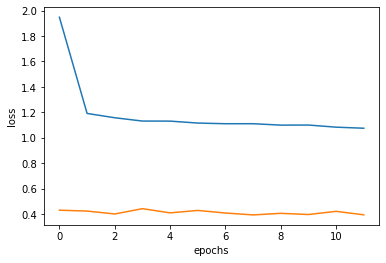

In [56]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'errors')

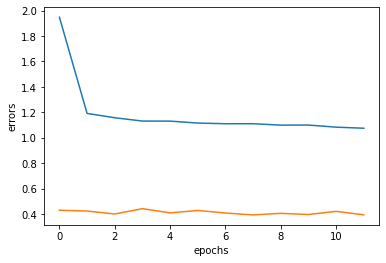

In [57]:
plt.plot(history.history["mean_squared_error"])
plt.plot(history.history["val_mean_squared_error"])
plt.xlabel("epochs")
plt.ylabel("errors")

In [58]:
model.evaluate(test_X,test_y)

459/459 [==============================] - 3s 7ms/step - loss: 0.7108 - mean_squared_error: 0.7108


[0.710821270942688, 0.710821270942688]

In [59]:
model.save("model.h5")